# Custom CNN: 7 convolutional layer
1. Read and Overview Data
3. Data Preparation
4. Create CNN Model
5. Train and Test the Model
6. Plotting Results
7. Conclusion

# 1. Read and Overview Data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
print(os.listdir("data/training"))

Using TensorFlow backend.


['111', '137', '155', '160', '228', '284', '33', '368', '42', '461', '48', '50', '505', '516', '52']


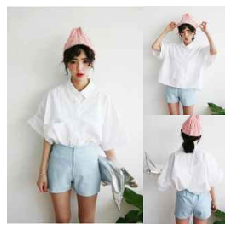

In [2]:
# plotting a random image from category 505
img = plt.imread("data/training/505/365.jpg")
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.axis("off")
plt.show()

### Read all data and create x, y data

In [6]:
x_ = list()
y = list()
IMG_SIZE = 128 # set image size to 128*128

for i in os.listdir("top10/505"):
    try:
        path = "top10/505/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None

In [7]:
for i in os.listdir("top10/160"):
    try:
        path = "top10/160/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None       
for i in os.listdir("top10/228"):
    try:
        path = "top10/228/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None        
for i in os.listdir("top10/111"):
    try:
        path = "top10/111/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None       
for i in os.listdir("top10/368"):
    try:
        path = "top10/368/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
        
#'155', '52', '284', '461', '48'
for i in os.listdir("top10/155"):
    try:
        path = "top10/155/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(5)
    except:
        None       
for i in os.listdir("top10/52"):
    try:
        path = "top10/52/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(6)
    except:
        None     
for i in os.listdir("top10/284"):
    try:
        path = "top10/284/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(7)
    except:
        None       
for i in os.listdir("top10/461"):
    try:
        path = "top10/461/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(8)
    except:
        None 
for i in os.listdir("top10/48"):
    try:
        path = "top10/48/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(9)
    except:
        None  
        

In [8]:
# check x_ list
x_ = np.array(x_)

In [9]:
print(x_)

[[[[102  95  77]
   [111 104  86]
   [124 117  99]
   ...
   [207 172 132]
   [205 170 130]
   [203 168 128]]

  [[106  99  81]
   [115 108  90]
   [128 121 103]
   ...
   [211 176 136]
   [209 174 134]
   [207 172 132]]

  [[111 104  86]
   [120 113  95]
   [132 125 107]
   ...
   [215 180 140]
   [213 178 138]
   [211 176 136]]

  ...

  [[190 128 113]
   [190 128 113]
   [193 131 116]
   ...
   [222 205 179]
   [218 201 175]
   [219 202 176]]

  [[197 135 120]
   [183 121 106]
   [187 125 110]
   ...
   [222 205 179]
   [218 201 175]
   [219 202 176]]

  [[193 131 116]
   [189 127 112]
   [184 122 107]
   ...
   [222 205 179]
   [218 201 175]
   [219 202 176]]]


 [[[229 235 233]
   [229 235 233]
   [229 235 233]
   ...
   [120  98  74]
   [140 122 102]
   [184 172 157]]

  [[229 235 233]
   [229 235 233]
   [229 235 233]
   ...
   [123 101  77]
   [151 134 114]
   [208 196 181]]

  [[229 235 233]
   [229 235 233]
   [229 235 233]
   ...
   [138 116  92]
   [177 160 139]
   [247 235

In [10]:
xreshape = x_.reshape(x_.shape[0],-1)

In [11]:
print(xreshape)
from numpy import asarray
from numpy import save
save('xreshape.npy',xreshape)

[[102  95  77 ... 219 202 176]
 [229 235 233 ... 186 185 191]
 [117 108 101 ...  48  34  19]
 ...
 [248 255 255 ... 189 197 210]
 [254 254 254 ... 255 255 255]
 [197 194 179 ... 240 243 236]]


In [12]:
# check y list
y = np.array(y)
print(y)

[0 0 0 ... 9 9 9]


In [13]:
# save y label
save('y.npy',y)

let's see how the images look.

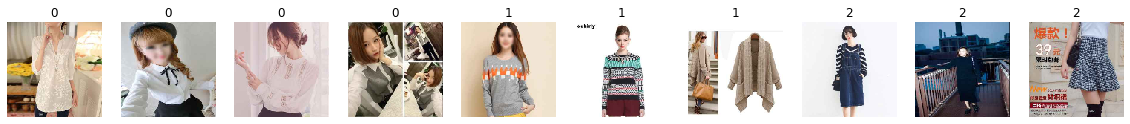

In [14]:
# plotting one of all clothing types in data
plt.figure(figsize = (20,20))
for i in range(10):
    img = x_[950*i]
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

# 2. Data Preparation

I'll replace flower types for the computer to understand.

In [15]:
# for replacement process i'll use keras.to_categorical 
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 10)

Firsly split test data then split train and validation datas

In [16]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.2,random_state = 42)

In [17]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.1,random_state = 42)

Plotting random 5 image in train data

C:\Users\tianshul\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



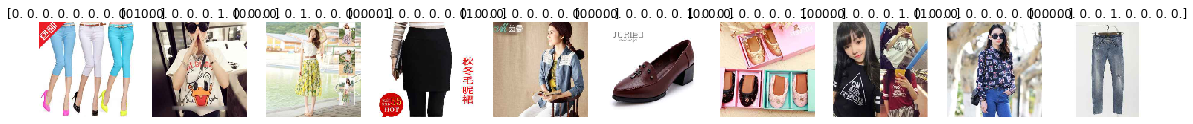

In [18]:
plt.figure(figsize = (20,20))
for i in range(10):
    img = x_train[600*i]
    plt.subplot(1,10,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

In [19]:
x_train.shape # check training data shape

(32672, 128, 128, 3)

# 3. Create CNN Model 

Create Sequential model with using Keras 

In [3]:
IMG_SIZE = 128 # set image size to 128*128
x_train = np.load('data/train_images.npy')
y_train = np.load('data/train_labels.npy')
x_val = np.load('data/val_images.npy')
y_val = np.load('data/val_labels.npy')
x_test = np.load('data/test_images.npy')
y_test = np.load('data/test_labels.npy')

In [4]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 15)
y_val = to_categorical(y_val,num_classes = 15)
y_test = to_categorical(y_test,num_classes = 15)
print(y_train.shape)

(60646, 15)


In [12]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 6th Convolutional Layer
model.add(Conv2D(filters=1024,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 6th Convolutional Layer
model.add(Conv2D(filters=2048,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Add output layer
model.add(Dense(15,activation="softmax"))
model.summary() # print summary of the model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 128)      

In [21]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

compile model

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

Set epoch and batch size values

In [14]:
epoch = 50 
batch_size = 64

Create a data augmentation and apply them x_train data 

In [16]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

# 4. Train and Test the Model

Train our model according to the data and the values we have prepared in the previous stages

In [17]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/50
947/947 [==============================] - 2865s 3s/step - loss: 2.6365 - accuracy: 0.2175 - val_loss: 2.2671 - val_accuracy: 0.3037
Epoch 2/50
947/947 [==============================] - 2861s 3s/step - loss: 2.1564 - accuracy: 0.3187 - val_loss: 1.9944 - val_accuracy: 0.3586
Epoch 3/50
947/947 [==============================] - 2859s 3s/step - loss: 1.9085 - accuracy: 0.3802 - val_loss: 1.7467 - val_accuracy: 0.4200
Epoch 4/50
947/947 [==============================] - 2863s 3s/step - loss: 1.7723 - accuracy: 0.4178 - val_loss: 1.6089 - val_accuracy: 0.4662
Epoch 5/50
947/947 [==============================] - 2861s 3s/step - loss: 1.6631 - accuracy: 0.4491 - val_loss: 1.5966 - val_accuracy: 0.4648
Epoch 6/50
947/947 [==============================] - 2858s 3s/step - loss: 1.5882 - accuracy: 0.4765 - val_loss: 1.7999 - val_accuracy: 0.4500
Epoch 7/50
947/947 [==============================] - 2862s 3s/step - loss: 1.5185 - accuracy: 0.4933 - val_loss: 1.4576 - val_accuracy:

Not bad for first time in my opinion. Let's look test result

In [22]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) 
#get score acording to test datas

16847/16847 [==============================] - 297s 18ms/step
Test Accuracy: 63.90%


Test accuracy a little bit lower than validation accuracy

In [31]:
# save model
model.save("model_7layerCNN.h5")
model.save_weights("weights_7layerCNN.h5")

# 5. Plotting Results

### Loss and accuracy

Text(0.5, 1.0, 'Loss Curve')

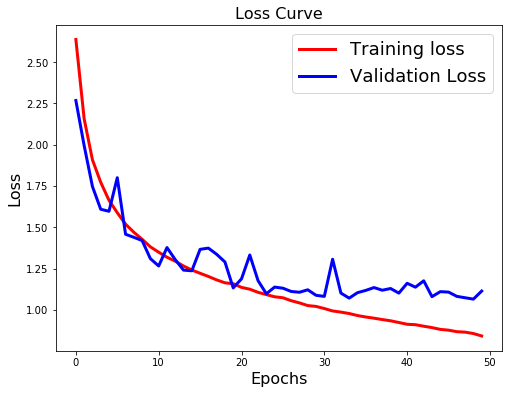

In [24]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss','Validation Loss'], fontsize=18)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curve',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curve')

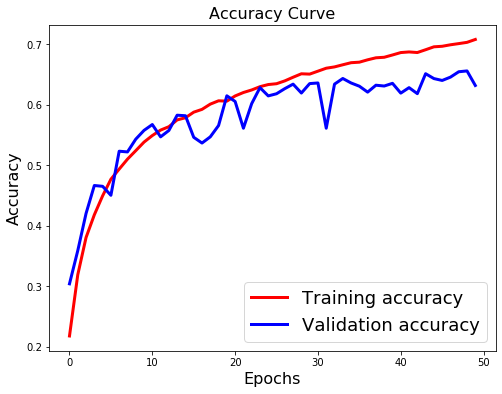

In [25]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=18)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curve',fontsize=16)

In [26]:
x_ = np.array(range(len(history.history['loss']))) # get loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['loss'], # get loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,255,0,0.9)"),
        text = "Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['accuracy'],# get accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,255,0.9)"),
        text = "Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Training Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

In [27]:
x_ = np.array(range(len(history.history['val_loss'])))# get validation loss values from the history
trace1 = go.Scatter(
        x = x_,
        y = history.history['val_loss'], # get validation loss values from the history
        mode = "lines",
        marker = dict(color = "rgba(0,0,0,0.9)"),
        text = "Validation Loss"
)
trace2 = go.Scatter(
        x = x_,
        y = history.history['val_accuracy'],# get validation accuracy values from the history
        mode = "lines",
        marker = dict(color = "rgba(255,0,0,0.9)"),
        text = "Validation Accuracy"
)
data = [trace1,trace2]
layout = dict(title = "Validation Accuracy and Loss")
fig = dict(data = data,layout=layout)
iplot(fig)

Plot confusion matrix according to test datas. 

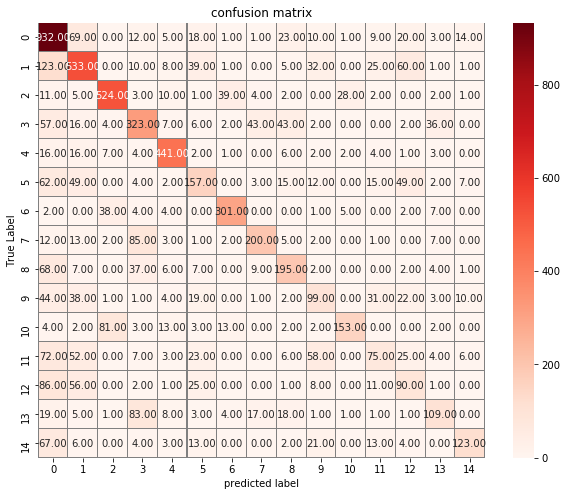

In [28]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

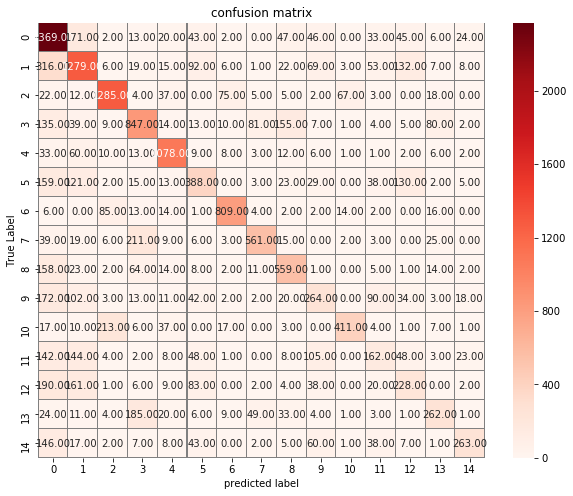

In [29]:
# confusion matrix of test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(y_true,y_pred_classes)
f,ax = plt.subplots(figsize = (10,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# 7. Conclusion
* Accuracy rate exceeded 68% limit while in the training phase. In the same way validation accuracy return the 66%, test accuracy is 67%.
* According to the confusion matrix, the most difficult to detect the type is 4 (skirt), 6(jeans), 7(bag). 
* According to the confusion matrix, the easiest to detect the type is 1 (trousers including pants/shorts).
* Most false prediction between rose and tuilps.